# 장애인콜택시 대기시간 예측
## 단계3. 모델링

## 0.미션

* 1.시계열 데이터에 맞는 전처리
    * 데이터가 2015 ~ 2022년까지 데이터 입니다.
    * 이 중 2022년 10월 ~ 2022년 12월까지(3개월)의 데이터는 성능 검증용으로 사용합니다.
    * 나머지 데이터를 이용하여 학습 및 튜닝을 수행합니다.
    * 이를 위한 데이터 전처리를 수행하시오.
* 2.모델 최적화
    * 머신러닝 
        * 알고리즘 중 3가지 이상을 선정하여 모델링을 수행합니다.
        * 각각 알고리즘에 맞는 튜닝 방법으로 최적의 모델을 만듭니다.
    * 딥러닝
        * 모델 구조를 2가지 이상을 생성하고 모델링을 수행합니다.
        * epochs, learning_rate 등을 조절하며 성능을 튜닝합니다.
    * 성능 평가
        * 시계열 그래프로 모델의 실제값과 예측값을 시각화하여 비교합니다.
        * 성능 지표 (MAE, MAPE) 를 사용해 가장 성능이 높은 모델을 선정합니다.

## 1.환경설정

### (1) 라이브러리 불러오기

* **세부 요구사항**
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import joblib

# 필요하다고 판단되는 라이브러리를 추가하세요.



### (2) 데이터 로딩
* 주어진 데이터셋
    * [2.탐색적 데이터분석] 단계에서 저장한 파일 : data2.pkl
* 다음의 두가지 방법 중 하나를 선택하시오.
    * 1) 로컬 수행(Ananconda)
    * 2) 구글콜랩

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [ ]:
path = ''

#### 2) 구글 콜랩 수행

* 구글 드라이브 연결

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/에이블_수업/0419미프6-2/'

#### 3) 데이터 읽어오기

In [ ]:
#file1 = 'data2.pkl'

In [5]:
file1 =joblib.load('/content/drive/MyDrive/에이블_수업/0419미프6-2/data1.pkl')

In [12]:
file1.head(10)

,Date,Taxi,accept,board,mean_wait,mean_fee,mean_distance,week,month,year,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),Day of Week,MA7_mean_wait,board_rate
0,2015-01-01,213,1023,924,23.2,2427,10764,1,1,2015,-4.3,-9.8,0.0,52.0,33.0,9.79,Thursday,NaN,0.903226
1,2015-01-02,420,3158,2839,17.2,2216,8611,1,1,2015,-2.0,-8.9,0.0,63.0,28.0,9.07,Friday,NaN,0.898987
2,2015-01-03,209,1648,1514,26.2,2377,10198,1,1,2015,2.4,-9.2,0.0,73.0,37.0,8.66,Saturday,NaN,0.918689
3,2015-01-04,196,1646,1526,24.5,2431,10955,1,1,2015,8.2,0.2,0.0,89.0,58.0,5.32,Sunday,NaN,0.927096
4,2015-01-05,421,4250,3730,26.2,2214,8663,2,1,2015,7.9,-0.9,0.0,95.0,52.0,6.48,Monday,NaN,0.877647
5,2015-01-06,417,3991,3633,23.6,2211,8545,2,1,2015,4.1,-7.4,3.4,98.0,29.0,10.47,Tuesday,NaN,0.910298
6,2015-01-07,410,4085,3676,24.7,2230,8646,2,1,2015,-1.0,-8.8,0.0,42.0,24.0,10.12,Wednesday,23.657143,0.899878
7,2015-01-08,419,4030,3728,21.2,2231,8683,2,1,2015,-0.2,-9.2,0.0,62.0,27.0,10.09,Thursday,23.371429,0.925062
8,2015-01-09,424,4167,3813,21.8,2215,8506,2,1,2015,3.2,-6.8,0.0,78.0,38.0,8.74,Friday,24.028571,0.915047
9,2015-01-10,215,1916,1645,41.2,2447,11123,2,1,2015,4.3,-5.5,0.0,81.0,33.0,9.41,Saturday,26.171429,0.858559


## 2.데이터 준비
* **세부요구사항**
    * NaN에 대한 조치를 수행하시오.
        * rolling 혹은 shift로 발생된 초기 행의 NaN은 삭제해도 무방합니다.
    * 가변수화 : 범주형에 대해서 가변수화를 수행합니다.
    * 데이터분할
        * 시계열 데이터 특성에 맞게 분할합니다.
        * 마지막 91일(3개월) 데이터를 검증셋으로 사용합니다.

### (0) 중복 행 확인 및 제거

### (1) NA 조치

In [10]:
df = file1.dropna(axis=0)

In [11]:
df

,Date,Taxi,accept,board,mean_wait,mean_fee,mean_distance,week,month,year,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),Day of Week,MA7_mean_wait,board_rate
6,2015-01-07,410,4085,3676,24.7,2230,8646,2,1,2015,-1.0,-8.8,0.0,42.0,24.0,10.12,Wednesday,23.657143,0.899878
7,2015-01-08,419,4030,3728,21.2,2231,8683,2,1,2015,-0.2,-9.2,0.0,62.0,27.0,10.09,Thursday,23.371429,0.925062
8,2015-01-09,424,4167,3813,21.8,2215,8506,2,1,2015,3.2,-6.8,0.0,78.0,38.0,8.74,Friday,24.028571,0.915047
9,2015-01-10,215,1916,1645,41.2,2447,11123,2,1,2015,4.3,-5.5,0.0,81.0,33.0,9.41,Saturday,26.171429,0.858559
10,2015-01-11,187,1700,1572,28.8,2419,10806,2,1,2015,2.3,-4.0,0.0,83.0,39.0,9.60,Sunday,26.785714,0.924706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,2022-12-27,669,5635,4654,44.4,2198,8178,52,12,2022,3.0,-7.3,0.0,86.0,51.0,10.25,Tuesday,42.771429,0.825909
2918,2022-12-28,607,5654,4648,44.8,2161,7882,52,12,2022,-0.3,-5.4,0.1,92.0,40.0,10.86,Wednesday,43.514286,0.822073
2919,2022-12-29,581,5250,4247,52.5,2229,8433,52,12,2022,1.7,-7.8,0.0,71.0,34.0,10.88,Thursday,42.957143,0.808952
2920,2022-12-30,600,5293,4200,38.3,2183,8155,52,12,2022,2.1,-4.0,0.0,87.0,38.0,10.84,Friday,41.042857,0.793501


### (2) 가변수화

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2916 entries, 6 to 2921
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             2916 non-null   datetime64[ns]
 1   Taxi             2916 non-null   int64         
 2   accept           2916 non-null   int64         
 3   board            2916 non-null   int64         
 4   mean_wait        2916 non-null   float64       
 5   mean_fee         2916 non-null   int64         
 6   mean_distance    2916 non-null   int64         
 7   week             2916 non-null   int64         
 8   month            2916 non-null   int64         
 9   year             2916 non-null   int64         
 10  temp_max         2916 non-null   float64       
 11  temp_min         2916 non-null   float64       
 12  rain(mm)         2916 non-null   float64       
 13  humidity_max(%)  2916 non-null   float64       
 14  humidity_min(%)  2916 non-null   float64

In [14]:
# 범주형 변수 : week  month  Day of Week

df = pd.get_dummies(data=df, columns=['week', 'month', 'Day of Week'], drop_first=True)
df

,Date,Taxi,accept,board,mean_wait,mean_fee,mean_distance,year,temp_max,temp_min,...,month_9,month_10,month_11,month_12,Day of Week_Tuesday,Day of Week_Wednesday,Day of Week_Thursday,Day of Week_Friday,Day of Week_Saturday,Day of Week_Sunday
6,2015-01-07,410,4085,3676,24.7,2230,8646,2015,-1.0,-8.8,...,0,0,0,0,0,1,0,0,0,0
7,2015-01-08,419,4030,3728,21.2,2231,8683,2015,-0.2,-9.2,...,0,0,0,0,0,0,1,0,0,0
8,2015-01-09,424,4167,3813,21.8,2215,8506,2015,3.2,-6.8,...,0,0,0,0,0,0,0,1,0,0
9,2015-01-10,215,1916,1645,41.2,2447,11123,2015,4.3,-5.5,...,0,0,0,0,0,0,0,0,1,0
10,2015-01-11,187,1700,1572,28.8,2419,10806,2015,2.3,-4.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,2022-12-27,669,5635,4654,44.4,2198,8178,2022,3.0,-7.3,...,0,0,0,1,1,0,0,0,0,0
2918,2022-12-28,607,5654,4648,44.8,2161,7882,2022,-0.3,-5.4,...,0,0,0,1,0,1,0,0,0,0
2919,2022-12-29,581,5250,4247,52.5,2229,8433,2022,1.7,-7.8,...,0,0,0,1,0,0,1,0,0,0
2920,2022-12-30,600,5293,4200,38.3,2183,8155,2022,2.1,-4.0,...,0,0,0,1,0,0,0,1,0,0


### (3) 데이터분할
* **세부요구사항**
    * 마지막 91일 간의 데이터를 검증 셋으로 만듭니다. (2022-10-01 ~ )
    * 이 기간의 날짜 리스트를 별도로 저장하여, 모델 검증시 시각화할 때 활용합니다.

#### 1) x, y 나누기

In [57]:
x = df.drop(['Date', 'mean_wait'], axis=1)
y = df['mean_wait']

#### 2) train : validation 나누기
* 힌트 : train_test_split(  ,   ,  test_size = 91, shuffle = False) 

In [58]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size = 91, shuffle = False)

In [59]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((2825, 83), (91, 83), (2825,), (91,))

### (4) Scaling
* KNN, SVM 알고리즘 및 DL을 적용하기 위해서는 스케일링을 해야 합니다.

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)


## 3.모델링
* **세부요구사항**
    * 머신러닝 알고리즘 중 3가지 이상을 사용하여 모델을 만들고 튜닝을 수행합니다.
    * 딥러닝 모델 구조 2가지 이상을 설계하고 모델을 생성합니다.
    * 성능 측정은 MAE, MAPE로 수행합니다.
    * 모델링 후 실제값과 예측값을 시각화(라인차트)하여 분석합니다.

### (1) 머신러닝

#### 내맘대루 - fbprophet

In [ ]:
#!pip install pystan~=2.14
#!pip install fbprophet

In [131]:
imsi = df[['Date', 'mean_wait']]
imsi

,Date,mean_wait
6,2015-01-07,24.7
7,2015-01-08,21.2
8,2015-01-09,21.8
9,2015-01-10,41.2
10,2015-01-11,28.8
...,...,...
2917,2022-12-27,44.4
2918,2022-12-28,44.8
2919,2022-12-29,52.5
2920,2022-12-30,38.3


<Axes: xlabel='Date'>

<Figure size 2000x800 with 0 Axes>

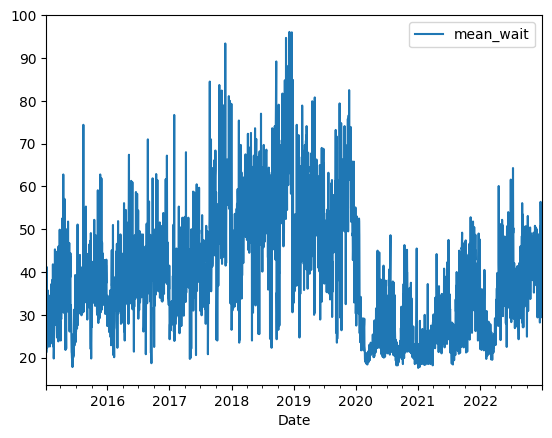

In [132]:
plt.figure(figsize=(20,8))
imsi.plot(x = 'Date', y = 'mean_wait')

In [109]:
imsi['Date'] = imsi['Date'].astype(np.int64)

<ipython-input-109-0cca0b7ddfcf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imsi['Date'] = imsi['Date'].astype(np.int64)


In [133]:
imsi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2916 entries, 6 to 2921
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2916 non-null   datetime64[ns]
 1   mean_wait  2916 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 68.3 KB


In [138]:
#imsi[imsi <= 0] = np.nan

# 로그 변환
log_imsi_1 = imsi
log_imsi_1['mean_wait'] = np.log(imsi['mean_wait'])

<ipython-input-138-41fd6de1df85>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_imsi_1['mean_wait'] = np.log(imsi['mean_wait'])


In [139]:
log_imsi_1

,Date,mean_wait
6,2015-01-07,3.206803
7,2015-01-08,3.054001
8,2015-01-09,3.081910
9,2015-01-10,3.718438
10,2015-01-11,3.360375
...,...,...
2917,2022-12-27,3.793239
2918,2022-12-28,3.802208
2919,2022-12-29,3.960813
2920,2022-12-30,3.645450


<Axes: xlabel='Date'>

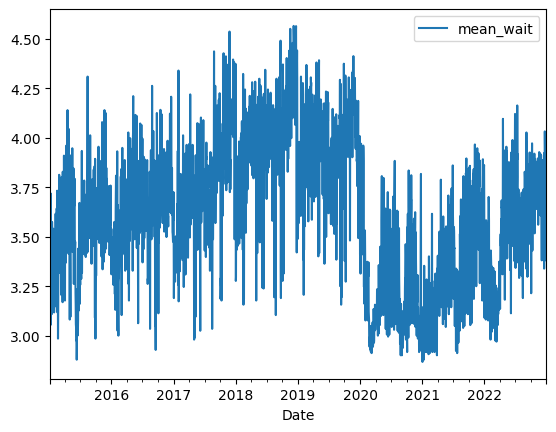

In [140]:
log_imsi_1.plot(x = 'Date', y = 'mean_wait')

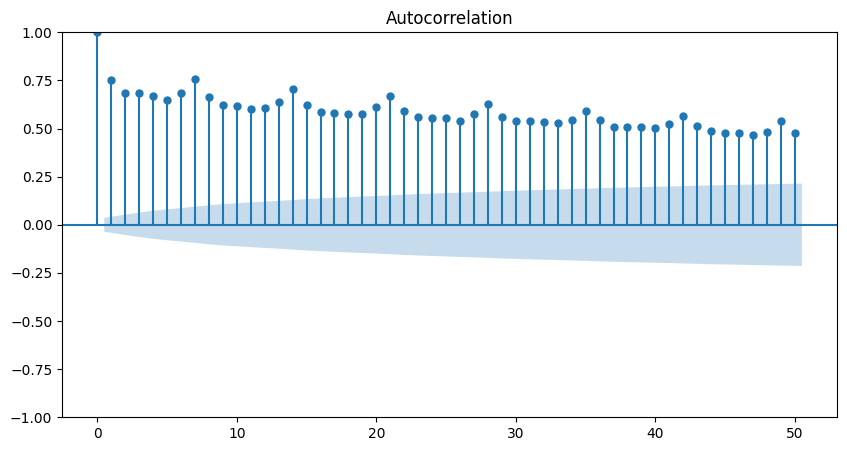

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


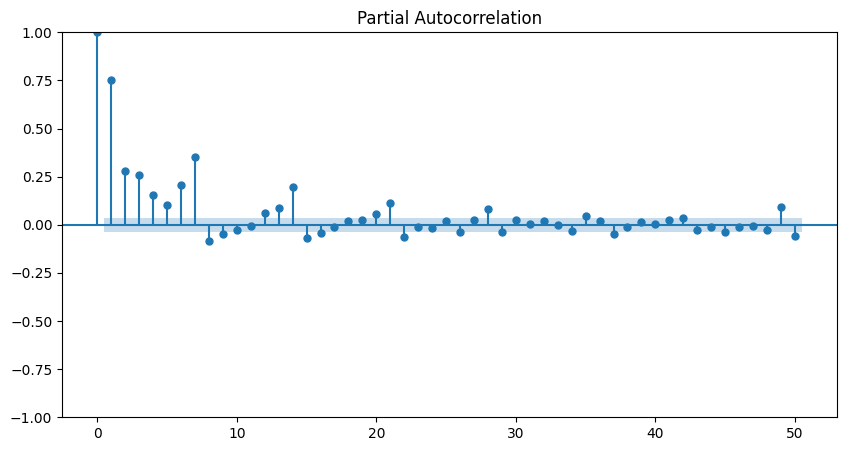

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 데이터 불러오기

# ACF 시각화
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(log_imsi_1['mean_wait'], lags=50, ax=ax)
plt.show()

# PACF 시각화
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(log_imsi_1['mean_wait'], lags=50, ax=ax)
plt.show()

# pacf보면 7마다 주기성 있음 -> 계절차분 7

In [149]:
diff_7 = log_imsi_1
diff_7['mean_wait'] = log_imsi_1['mean_wait'].diff(7)

<ipython-input-149-60004b422765>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diff_7['mean_wait'] = log_imsi_1['mean_wait'].diff(7)


In [150]:
diff_7 = diff_7.dropna()

In [151]:
diff_7

,Date,mean_wait
20,2015-01-21,0.145422
21,2015-01-22,-0.011385
22,2015-01-23,-0.000129
23,2015-01-24,0.109096
24,2015-01-25,-0.199306
...,...,...
2917,2022-12-27,-0.278561
2918,2022-12-28,0.019701
2919,2022-12-29,-0.402823
2920,2022-12-30,-0.447732


<Axes: xlabel='Date'>

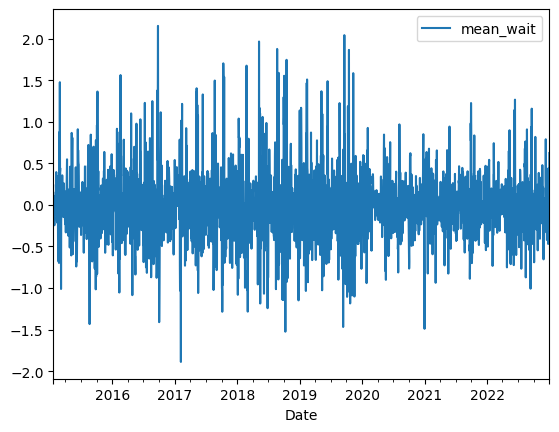

In [152]:
diff_7.plot(x = 'Date', y = 'mean_wait')

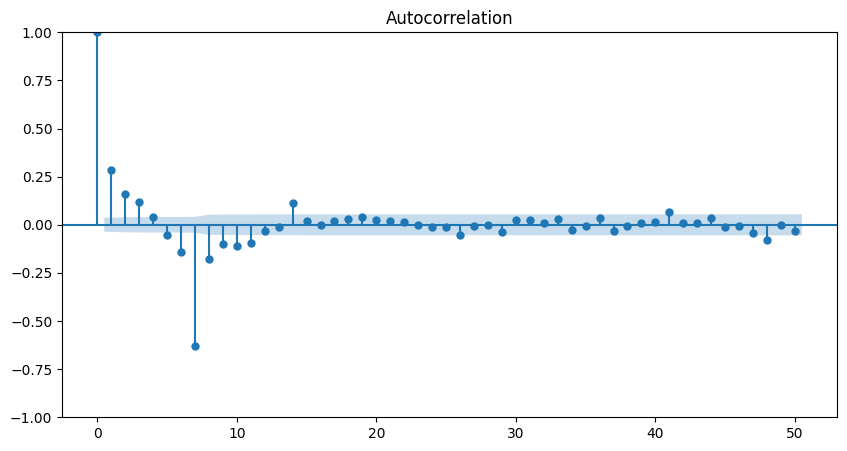

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


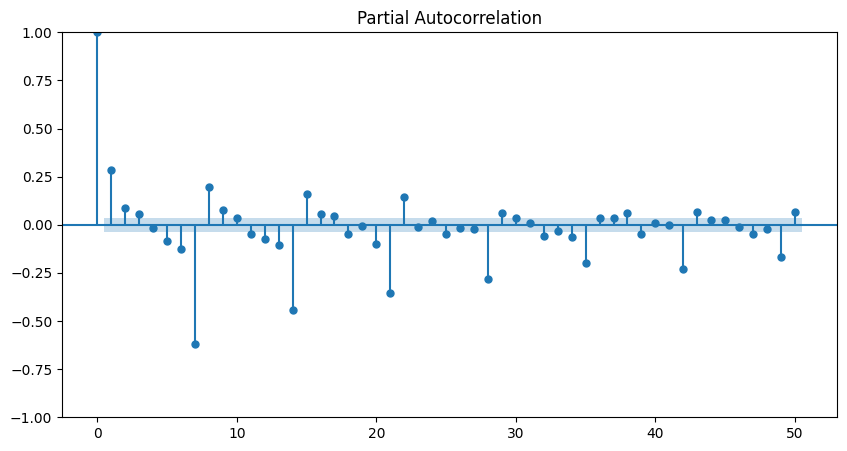

In [153]:
# ACF 시각화
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(diff_7['mean_wait'], lags=50, ax=ax)
plt.show()

# PACF 시각화
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(diff_7['mean_wait'], lags=50, ax=ax)
plt.show()

In [166]:
# 게절차분 한번 더 하기
diff_77 = diff_7
diff_77['mean_wait'] = diff_77['mean_wait'].diff(7)
diff_77 = diff_77.dropna()

<ipython-input-166-e0e7533f5a9d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diff_77['mean_wait'] = diff_77['mean_wait'].diff(7)


<Axes: xlabel='Date'>

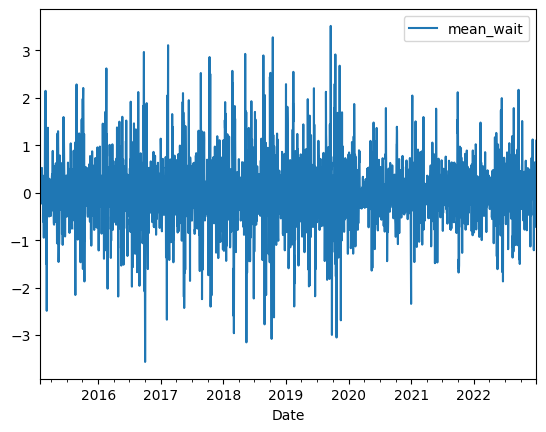

In [167]:
diff_77.plot(x = 'Date', y = 'mean_wait')

In [168]:
diff_77

,Date,mean_wait
27,2015-01-28,-0.223248
28,2015-01-29,-0.067076
29,2015-01-30,-0.119907
30,2015-01-31,-0.234869
31,2015-02-01,0.124583
...,...,...
2917,2022-12-27,-0.327809
2918,2022-12-28,-0.190178
2919,2022-12-29,-0.721568
2920,2022-12-30,-0.635021


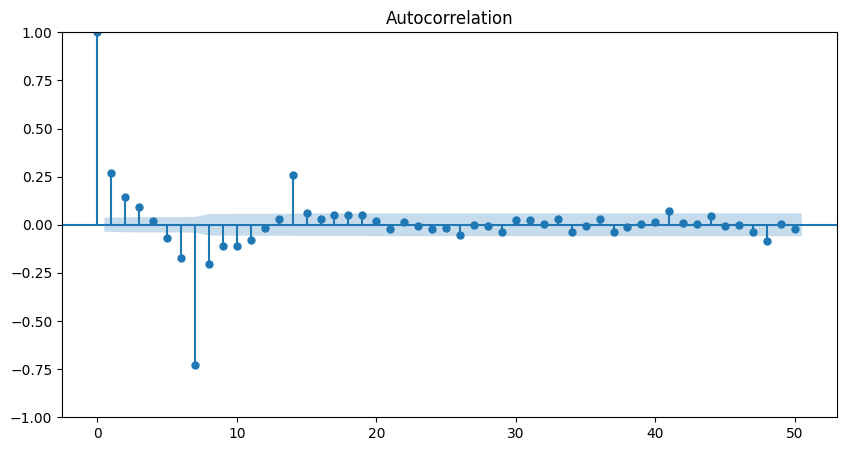

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


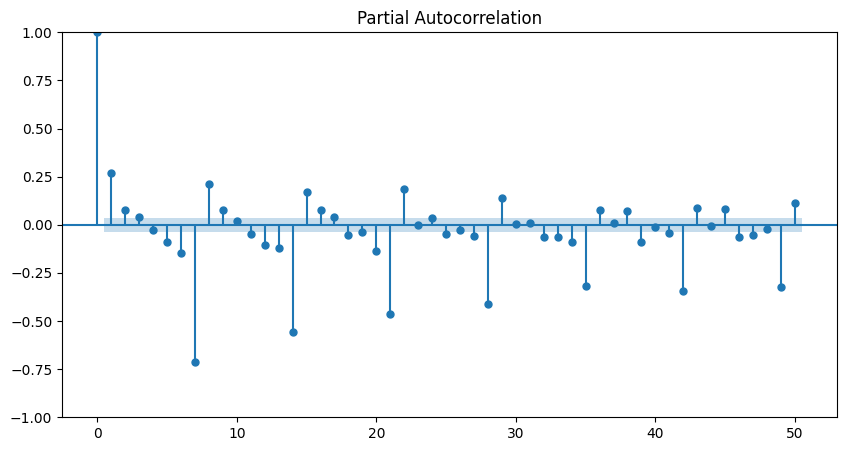

In [169]:
# ACF 시각화
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(diff_77['mean_wait'], lags=50, ax=ax)
plt.show()

# PACF 시각화
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(diff_77['mean_wait'], lags=50, ax=ax)
plt.show()

In [116]:
diff_imsi['Date'] = pd.to_datetime(diff_imsi['Date'])

In [117]:
diff_imsi.columns = ['ds', 'y']

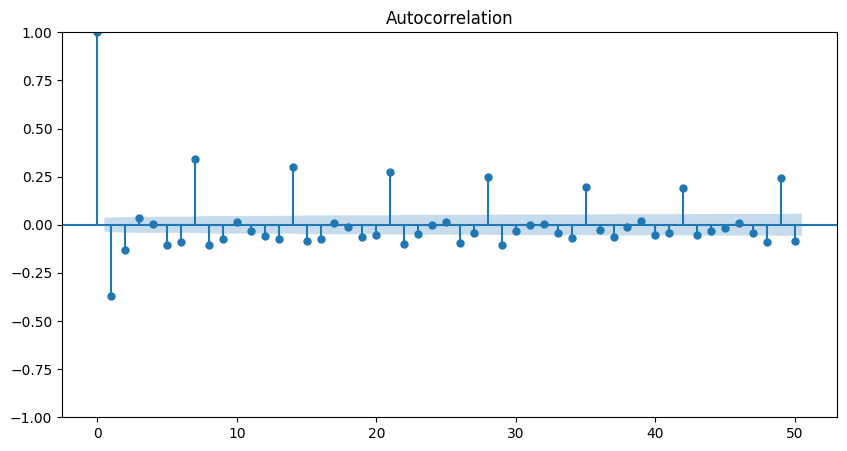

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


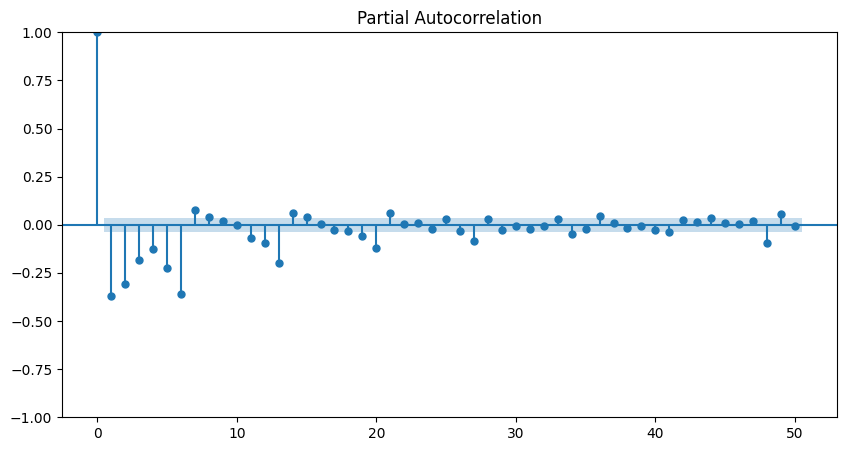

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# ACF 시각화
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(diff_imsi['y'], lags=50, ax=ax)
plt.show()

# PACF 시각화
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(diff_imsi['y'], lags=50, ax=ax)
plt.show()




In [119]:
# 7마다 계절차분하기
seasonal_diff = diff_imsi.diff(7)
seasonal_diff = seasonal_diff.dropna()


<Axes: >

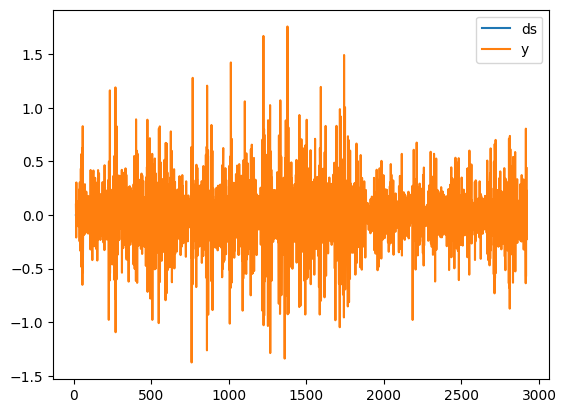

In [121]:
seasonal_diff.plot()

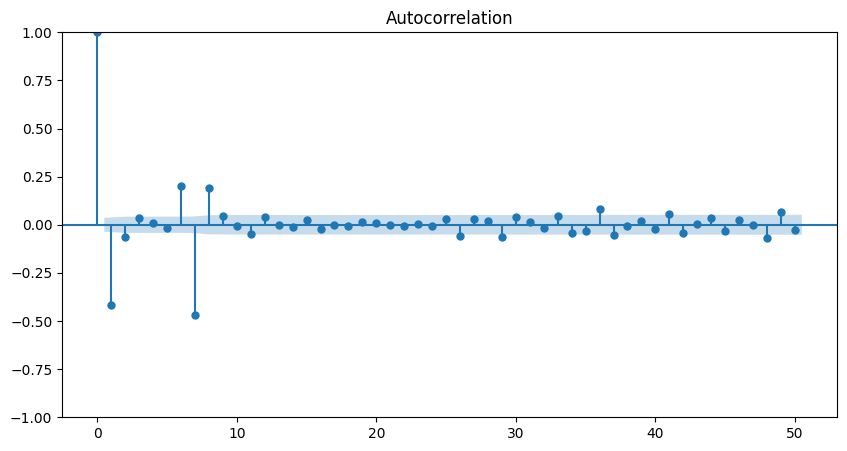

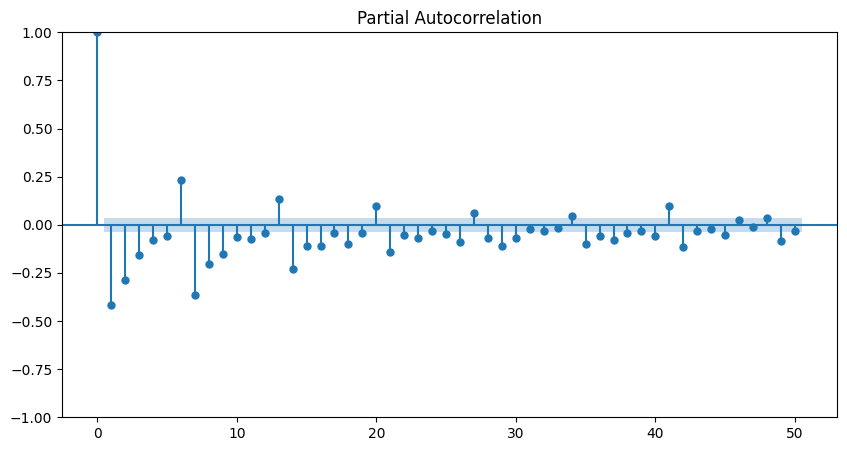

In [122]:
# ACF 시각화
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(seasonal_diff['y'], lags=50, ax=ax)
plt.show()

# PACF 시각화
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(seasonal_diff['y'], lags=50, ax=ax)
plt.show()

In [129]:
# 7마다 계절차분 한번 더
seasonal_diff_14 = seasonal_diff.diff(7)
seasonal_diff_14 = seasonal_diff_14.dropna()


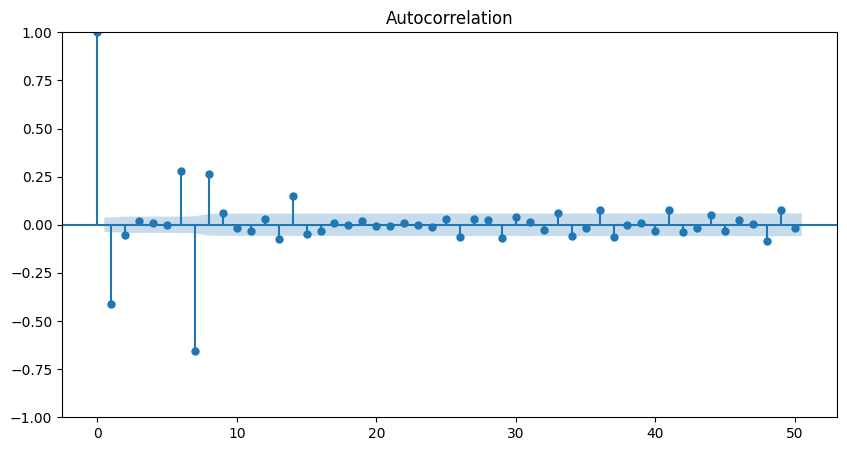

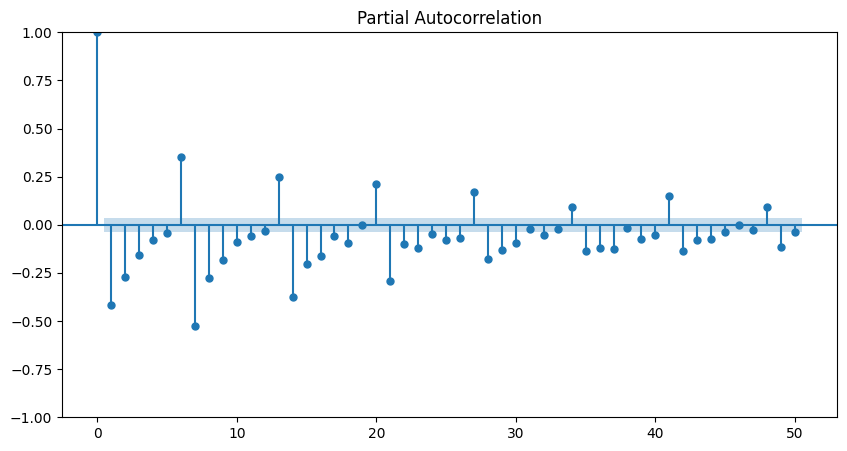

In [130]:
# ACF 시각화
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(seasonal_diff_14['y'], lags=50, ax=ax)
plt.show()

# PACF 시각화
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(seasonal_diff_14['y'], lags=50, ax=ax)
plt.show()

In [125]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [127]:
pip install --upgrade --no-deps statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [128]:
import statsmodels
import statmodels.api as sm
import matplotlib.pyplot as plt

ModuleNotFoundError: ignored

In [ ]:
fit=sm.tsa.arima.ARIMA(search_df.search, order=(0,1,1)).fit()
display(fit.summary())

In [27]:
from fbprophet import Prophet
model_pro= Prophet()
model_pro.fit(imsi)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [ ]:

# 예측할 기간 설정
future = model_pro.make_future_dataframe(periods=365)

# 예측 수행
forecast = model_pro.predict(future)


In [29]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

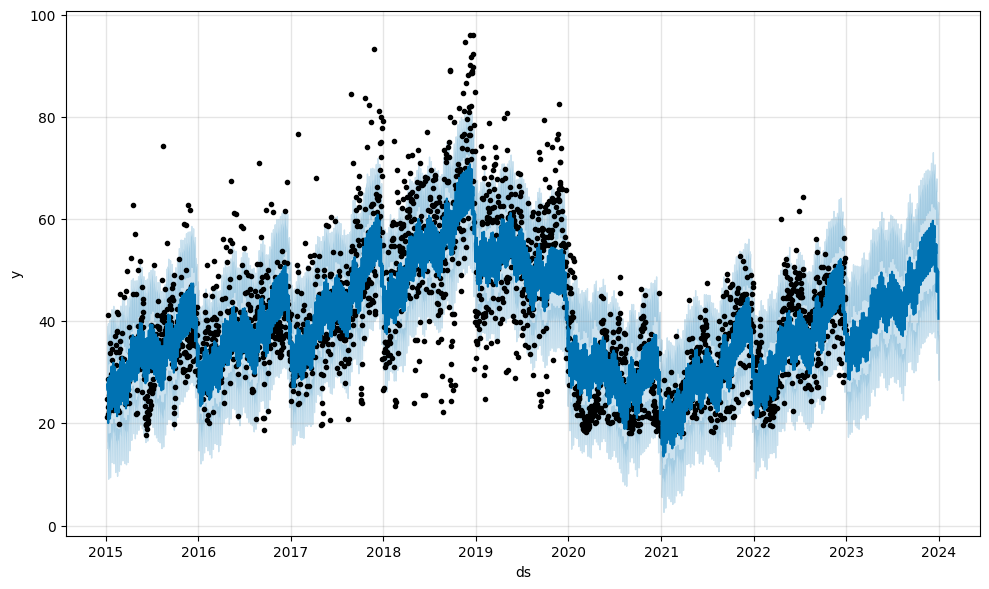

In [37]:
model_pro.plot(forecast)
plt.show()

#### 1) 모델1  - RF

MAE는 예측값과 실제값의 차이를 절댓값으로 구한 후 이를 평균한 값입니다. **MAE가 작을수록 모델의 예측이 더 정확하다** 는 것을 의미합니다.

MAPE는 예측값과 실제값의 상대적인 차이를 백분율로 나타낸 값입니다. **MAPE가 작을수록 모델의 예측이 더 정확하다**는 것을 의미합니다.

일반적으로 MAE는 예측 오차의 크기를 나타내는 지표로 많이 사용되고, MAPE는 예측 오차의 상대적인 크기를 나타내는 지표로 많이 사용됩니다. 둘 다 예측 성능을 평가하는 데 사용되지만, 문제의 특성에 따라 적합한 지표를 선택하여 사용하는 것이 좋습니다.

성능을 비교할 때는 모델 간의 MAE와 MAPE를 비교하여 둘 다 작은 모델이 예측이 더 정확하다고 할 수 있습니다.

In [60]:
from sklearn.ensemble import RandomForestRegressor

# 모델 생성
RF = RandomForestRegressor(n_estimators=100, random_state=42)

# 모델 학습
RF.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [63]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
# 검증 세트 예측
y_pred = RF.predict(x_val)

# 성능 측정
mae = mean_absolute_error(y_val, y_pred)
mape = mean_absolute_percentage_error(y_val, y_pred)

print("Random Forest 모델의 MAE: ", mae)
print("Random Forest 모델의 MAPE: ", mape)

Random Forest 모델의 MAE:  3.1788351648351654
Random Forest 모델의 MAPE:  0.0774826035010812


#### 2) 모델2  - SVM

In [66]:
from sklearn.svm import SVR
SVR = SVR(kernel="linear")
SVR.fit(x_train_scaled, y_train)

SVR(kernel='linear')

In [69]:
y_pred_SVR = SVR.predict(x_val_scaled)

# 성능 측정
mae_SVR = mean_absolute_error(y_val, y_pred_SVR)
mape_SVR= mean_absolute_percentage_error(y_val, y_pred_SVR)

print("SVM 모델의 MAE: ", mae_SVR)
print("SVM 모델의 MAPE: ", mape_SVR)

SVM 모델의 MAE:  4.338541571623625
SVM 모델의 MAPE:  0.1110460986861924


#### 3) 모델3

### (2) 딥러닝

#### 1) 모델1

In [74]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K


K.clear_session()

# 모델 생성
mlp_model = Sequential()
mlp_model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))
mlp_model.add(Dense(32, activation='relu'))
mlp_model.add(Dense(1, activation='linear'))

# 모델 컴파일
mlp_model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['mean_absolute_error', 'mean_absolute_percentage_error'])


In [75]:
earlystop_callback = EarlyStopping(monitor='val_loss', patience=10)
# checkpoint_callback = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

In [78]:
history = mlp_model.fit(x_train, y_train,
                    epochs=500,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Epoch 1/500
89/89 [==============================] - 0s 4ms/step - loss: 57.9412 - mean_absolute_error: 5.7113 - mean_absolute_percentage_error: 15.7136 - val_loss: 26.5803 - val_mean_absolute_error: 4.3200 - val_mean_absolute_percentage_error: 10.3646
Epoch 2/500
89/89 [==============================] - 0s 4ms/step - loss: 80.9840 - mean_absolute_error: 7.0597 - mean_absolute_percentage_error: 19.5336 - val_loss: 547.2470 - val_mean_absolute_error: 22.6551 - val_mean_absolute_percentage_error: 51.3910
Epoch 3/500
89/89 [==============================] - 0s 4ms/step - loss: 111.4433 - mean_absolute_error: 8.1103 - mean_absolute_percentage_error: 22.5498 - val_loss: 70.3182 - val_mean_absolute_error: 7.0931 - val_mean_absolute_percentage_error: 18.0216
Epoch 4/500
89/89 [==============================] - 0s 4ms/step - loss: 60.6759 - mean_absolute_error: 5.8777 - mean_absolute_percentage_error: 16.1445 - val_loss: 63.9322 - val_mean_absolute_error: 7.0333 - val_mean_absolute_percentage_

In [80]:
loss, mae, mape = mlp_model.evaluate(x_val, y_val)

3/3 [==============================] - 0s 4ms/step - loss: 21.3980 - mean_absolute_error: 3.7966 - mean_absolute_percentage_error: 8.6535


In [81]:
print("loss: ", loss)
print("mae: ", mae)
print("mape: ", mape)

loss:  21.39803695678711
mae:  3.7965691089630127
mape:  8.653520584106445


#### 2) 모델2

In [95]:
x_train = np.array(x_train)
x_train = x_train.reshape((x_train.shape[0], timesteps, input_dim))
x_val = np.array(x_val)
x_val = x_val.reshape((x_val.shape[0], timesteps, input_dim))

y_train = np.array(y_train)
y_val = np.array(y_val)

In [96]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras import layers

K.clear_session()

timesteps = 1
input_dim = 83
output_dim = 1

model = Sequential()
model.add(LSTM(units=64, input_shape=(timesteps, input_dim)))
model.add(Dense(units=output_dim, activation='linear'))

model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mape'])



In [97]:
earlystop_callback = EarlyStopping(monitor='val_loss', patience=10)

In [98]:
history = model.fit(x_train, y_train,
                    epochs=500,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Epoch 1/500
89/89 [==============================] - 5s 14ms/step - loss: 1782.1553 - mae: 39.7241 - mape: 98.5346 - val_loss: 1812.6439 - val_mae: 42.1427 - val_mape: 96.7628
Epoch 2/500
89/89 [==============================] - 0s 4ms/step - loss: 1661.7679 - mae: 38.1941 - mape: 94.2985 - val_loss: 1704.0386 - val_mae: 40.8417 - val_mape: 93.7274
Epoch 3/500
89/89 [==============================] - 0s 4ms/step - loss: 1563.4681 - mae: 36.8806 - mape: 90.6001 - val_loss: 1596.6492 - val_mae: 39.4977 - val_mape: 90.5444
Epoch 4/500
89/89 [==============================] - 0s 4ms/step - loss: 1465.9797 - mae: 35.5325 - mape: 86.7992 - val_loss: 1494.1722 - val_mae: 38.1708 - val_mape: 87.4022
Epoch 5/500
89/89 [==============================] - 0s 4ms/step - loss: 1378.7668 - mae: 34.2827 - mape: 83.2882 - val_loss: 1402.9700 - val_mae: 36.9568 - val_mape: 84.5472
Epoch 6/500
89/89 [==============================] - 0s 4ms/step - loss: 1298.1178 - mae: 33.0855 - mape: 79.9277 - val_loss

In [99]:
loss, mae, mape = model.evaluate(x_val, y_val)

3/3 [==============================] - 0s 5ms/step - loss: 48.0828 - mae: 5.9341 - mape: 13.8399


In [100]:
print("loss: ", loss)
print("mae: ", mae)
print("mape: ", mape)

loss:  48.08280563354492
mae:  5.934073448181152
mape:  13.839860916137695


## 4.모델 비교
* **세부요구사항**
    * 모델링 단계에서 생성한 모든 모델의 성능을 하나로 모아서 비교합니다.
    * 가장 성능이 높은 모델을 선정합니다.